In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import shutil
from tqdm import tqdm
os.getcwd()
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.2.0-rc4


In [0]:
count = 0
for _,i,j in os.walk("/content/drive/My Drive/dataset/train"):
  print(i)
  sub_path = i
  count += 1
  if count > 0:
    break
  sub_path

['8', '11', '12', '16', '15', '14', '9', '13', '10', '.ipynb_checkpoints', '38male', '65male', '42female', '54male', '33female', '47female', '21male', '20female', '27female', '40male', '24female', '37female', '39female', '60female', '43female', '37male', '57female', '28female', '45male', '58female', '26male', '35female', '72male', '46male', '70female', '36male', '22female', '39male', '41male', '33male', '25female', '44female', '32female', '29female', '42male', '19female', '35male', '67male', '24male', '16male', '28male', '21female', '34male', '31female', '26female', '49female', '23male', '30male', '63male', '50male', '32male', '45female', '36female', '23female', '31male', '68male', '22male', '40female', '52female', '50female', '17female', '19male', '48male', '34female', '61male', '15male', '30female', '13female', '9female', '81male', '55male', '11female', '12male', '47male', '58male', '54female', '49male', '43male', '51male', '67female', '18female', '73male', '29male', '15female', '52m

In [0]:
for i in tqdm(sub_path):
    for _,_,j in os.walk("/content/drive/My Drive/dataset/train/{}".format(i)):
      for k in j:
          shutil.move('/content/drive/My Drive/dataset/train/{}/{}'.format(i,k), 
                          '/content/drive/My Drive/dataset/train/{}'.format(k))

100%|██████████| 205/205 [35:33<00:00, 10.41s/it] 


In [0]:
IMG_WIDTH, IMG_HEIGHT = 128, 128
def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

x_train = []
for i in range(5*10**3):
    file_path = "/content/drive/My Drive/dataset/train/{}.jpg".format(i)
    if os.path.exists(file_path):
        img = tf.io.read_file(file_path)
        x_train.append(tf.cast(tf.image.decode_jpeg(img, channels=3),dtype=tf.float32))

In [0]:
len(x_train)

9

In [0]:
y_train = []
with open('/content/drive/My Drive/dataset/index_train.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        pic_name = row[0] + ".jpg"
        old_folder_name = str(int(row[0])//10**4)
        pic_label = [int(row[1]),row[2]]
        y_train.append(pic_label)

In [0]:
y_train = []
with open('/content/drive/My Drive/dataset/index_train.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        pic_name = row[0] + ".jpg"
        old_folder_name = str(int(row[0])//10**4)
        pic_label = [int(row[1]),row[2]]
        if pic_label not in y: 
            y_train.append(pic_label)
        new_folder_name = str(int(row[1]))+str(row[2])
        if not os.path.exists('/content/drive/My Drive/dataset/train/{}'.format(new_folder_name)):
            os.mkdir('/content/drive/My Drive/dataset/train/{}'.format(new_folder_name))
        if os.path.exists("/content/drive/My Drive/dataset/train/{}".format(old_folder_name+"/"+pic_name)):
            shutil.move("/content/drive/My Drive/dataset/train/{}".format(old_folder_name+"/"+pic_name), 
                        "/content/drive/My Drive/dataset/train/{}".format(new_folder_name+"/"+pic_name))

In [0]:
im_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_data_generator = im_generator.flow_from_directory(directory = '/content/drive/My Drive/dataset/train', 
    target_size = [128, 128], batch_size = 4, shuffle = True,class_mode="sparse")

Found 114368 images belonging to 218 classes.


In [0]:
count = 0
for i,j in train_data_generator:
  print(j)
  if count > 1: break
  count += 1

[74. 47. 82. 78.]
[ 45. 169.  51.  77.]
[ 48.  60. 122.  38.]


In [0]:
def regression_flow_from_directory(flow_from_directory_gen, list_of_values):
    for x, y in train_data_generator:
        yield x, tf.constant( [[y_train[int(i)][0],(y_train[int(i)][1]=="male")*1] for i in y],dtype=tf.float32 )
count = 0
for i,j in regression_flow_from_directory(train_data_generator,y_train):
  print(j)
  count += 1
  if count > 2:
    break

tf.Tensor(
[[30.  1.]
 [31.  0.]
 [45.  1.]
 [31.  0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[37.  0.]
 [37.  0.]
 [36.  1.]
 [35.  1.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[40.  0.]
 [26.  0.]
 [29.  0.]
 [28.  1.]], shape=(4, 2), dtype=float32)


In [0]:
##################            ########################

(100, 84, 3)

In [9]:
tf.keras.backend.clear_session()
del model
del x_train
del y_train

NameError: ignored

In [0]:
data_mode = ["prep_",""][1]
x_train = np.load("/content/drive/My Drive/dataset/{}x_train_0.npy".format(data_mode))
y_train = np.load("/content/drive/My Drive/dataset/y_train_0.npy")
for i in range(1,3):
  x_train = np.concatenate((
      x_train,
      np.load("/content/drive/My Drive/dataset/{}x_train_{}.npy".format(data_mode,i)))
  ,0)
  y_train = np.concatenate((
    y_train,
    np.load("/content/drive/My Drive/dataset/y_train_{}.npy".format(i)))
  ,0)

if data_mode == "prep_":
    good_img_idx = []
    for i in range(len(x_train)):
        if np.mean(x_train[i][:,:,1]==200)<0.5:
            good_img_idx.append(i)
    x_train = x_train[good_img_idx]
    y_train = y_train[good_img_idx]

x_train = x_train/255.



x_test = x_train[-5500:]
y_test = y_train[-5500:]

x_train = x_train[:-5500]
y_train = y_train[:-5500]


age_train = np.array([i/100. for i,j in y_train])
gender_train = np.array([j for i,j in y_train])
age_test = np.array([i/100. for i,j in y_test])
gender_test = np.array([j for i,j in y_test])

In [3]:
gender_test.shape

(5000,)

In [0]:
# model2 = tf.keras.applications.ResNet50(weights = "imagenet", include_top=False, input_shape=(100, 84, 3))
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import itertools
#import shutil
%matplotlib inline

In [0]:
# del model2
mo_hist = []

In [10]:
model2 = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(100, 84, 3))
x = model2.layers[-1].output
x = Flatten()(x)

y1 = Dense(512, activation='relu')(x)
y1 = Dropout(0.4)(y1)
y1 = Dense(256, activation='relu')(y1)
y1 = Dropout(0.4)(y1)
y1 = Dense(1,name="age", activation='sigmoid')(y1)

y2 = Dense(512, activation='relu')(x)
y2 = Dropout(0.4)(y2)
# y2 = Dense(256, activation='relu')(y2)
# y2 = Dropout(0.4)(y2)
y2 = Dense(1,activation='sigmoid',name="gender")(y2)

model = Model(model2.input,[y1,y2])
model.compile(
    loss={'age':'mae',
          "gender":keras.losses.BinaryCrossentropy()},
    optimizer=tf.keras.optimizers.Adam(0.00002),
    metrics={'age':'mae',"gender":"accuracy"}
)

for epoch in range(7):
    model.fit(x_train,
            {'age':age_train,'gender':gender_train}, 
            batch_size=64, epochs=1)
    mo_hist.append(model.evaluate(x_test,[age_test,gender_test]))

172/172 [==============================] - 17s 97ms/step - loss: 0.7200 - age_loss: 0.0954 - gender_loss: 0.6246 - age_mae: 0.0954 - gender_accuracy: 0.8464


loss: 0.4652 - age_loss: 0.0977 - gender_loss: 0.3675 - age_mae: 0.0977 - gender_accuracy: 0.8458

loss: 0.4382 - age_loss: 0.0946 - gender_loss: 0.3436 - age_mae: 0.0946 - gender_accuracy: 0.8565

loss: 0.4529 - age_loss: 0.0944 - gender_loss: 0.3585 - age_mae: 0.0944 - gender_accuracy: 0.8515

 loss: 0.5448 - age_loss: 0.0942 - gender_loss: 0.4507 - age_mae: 0.0942 - gender_accuracy: 0.8507

 loss: 0.6950 - age_loss: 0.0929 - gender_loss: 0.6021 - age_mae: 0.0929 - gender_accuracy: 0.8511

 loss: 0.8066 - age_loss: 0.0922 - gender_loss: 0.7144 - age_mae: 0.0922 - gender_accuracy: 0.8547

 loss: 0.9291 - age_loss: 0.0920 - gender_loss: 0.8371 - age_mae: 0.0920 - gender_accuracy: 0.8445

In [1]:
xcep_hist

NameError: ignored

In [0]:
van_hist = []

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from glob import glob
import time, gc
import cv2
from tensorflow import keras
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import clone_model
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
from matplotlib import pyplot as plt
import seaborn as sns
import albumentations as A

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D


for cc in range(4):

    inputs = Input(shape = (100, 84, 3))

    # Begin
    model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', strides= 2, activation='relu', input_shape=(100, 84, 3))(inputs)
    model = MaxPool2D(pool_size=(3, 3), strides= 2)(model)

    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=64, kernel_size=(1, 1), padding='SAME', activation='relu')(model)
    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)

    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=64, kernel_size=(1, 1), padding='SAME', activation='relu')(model)
    model = AveragePooling2D(pool_size=(2, 2), strides= 2)(model)

    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=128, kernel_size=(1, 1), padding='SAME', activation='relu')(model)
    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)

    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=128, kernel_size=(1, 1), padding='SAME', activation='relu')(model)
    model = AveragePooling2D(pool_size=(2, 2), strides= 2)(model)

    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=256, kernel_size=(1, 1), padding='SAME', activation='relu')(model)
    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)

    model = BatchNormalization(momentum=0.15)(model)
    model = Conv2D(filters=256, kernel_size=(1, 1), padding='SAME', activation='relu')(model)
    model = AveragePooling2D(pool_size=(2, 2), strides= 2)(model)


    model = GlobalAveragePooling2D()(model)

    y1 = Dense(1024, activation='relu')(model)
    y1 = Dropout(0.4)(y1)
    # y1 = Dense(256, activation='relu')(y1)
    # y1 = Dropout(0.5)(y1)
    y1 = Dense(1,name="age", activation='relu')(y1)

    y2 = Dense(1024, activation='sigmoid')(model)
    y2 = Dropout(0.4)(y2)
    # y2 = Dense(256, activation='relu')(y2)
    # y2 = Dropout(0.5)(y2)
    y2 = Dense(1,activation='sigmoid',name="gender")(y2)

    model = Model(inputs=inputs, outputs=[y1,y2])
    model.compile(
        loss={'age':'mae',
            "gender":keras.losses.BinaryCrossentropy()},
        optimizer=tf.keras.optimizers.Adam(0.00002),
        metrics={'age':'mae',"gender":"accuracy"}
    )
    van_hist.append(model.fit(x_train,
            {'age':age,'gender':gender}, 
            batch_size=64, epochs=20,
            validation_split=0.2))
    tf.keras.backend.clear_session()
    del model

In [0]:
keras.utils.plot_model(model)

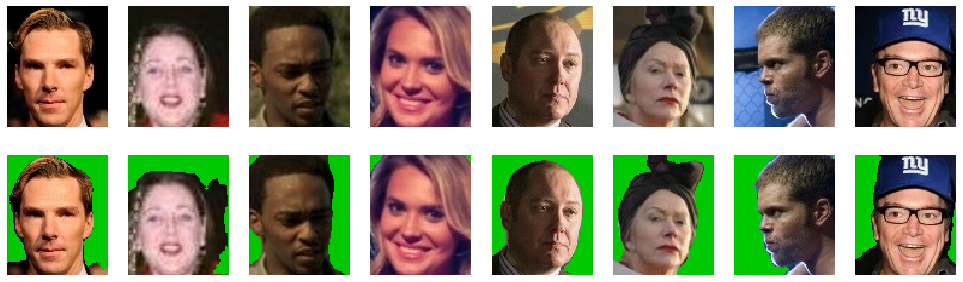

In [12]:
import numpy as np
prep_x = np.load("drive/My Drive/dataset/prep_x_train_0.npy")
x = np.load("drive/My Drive/dataset/x_train_0.npy")
%matplotlib inline
import matplotlib.pyplot as plt
start= 2835
step = 8

fig, axs = plt.subplots(2,step,figsize=(17,5))
for i in range(step):
    axs[0,i].matshow(x[start+i])
    axs[0,i].axis('off')
    axs[1,i].matshow(prep_x[start+i])
    axs[1,i].axis('off')
plt.savefig("preprocess_eg.png", bbox_inches='tight')
plt.show()

In [0]:
van_history = [van_hist[i].history for i in range(3)]

In [0]:
import pickle

with open('xcepres_hist.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(mo_hist, f)

# with open('van_hist.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
#     obj0 = pickle.load(f)

In [0]:
del van_hist

In [0]:
with open('van_hist.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    his0 = pickle.load(f)
with open('van_hist_p.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    his1 = pickle.load(f)

In [0]:
key = ['val_loss','val_gender_accuracy','val_age_mae'][1]

his0_sum = []
for i in range(3):
    his0_sum.append(np.array(his0[i][key]))
his0_sum = np.array(his0_sum)

his1_sum = []
for i in range(3):
    his1_sum.append(np.array(his1[i][key]))
his1_sum = np.array(his1_sum)

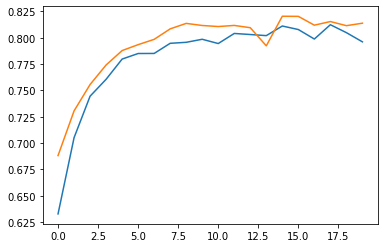

In [94]:
plt.plot(np.mean(his0_sum,0))
plt.plot(np.mean(his1_sum,0))

In [0]:
for k in range(5,7):
    list_to_save = []
    list_im = np.load(dir_name + "/x_train_{}.npy".format(k))
    for i in tqdm(range(0,len(list_im))):
        image = Image.fromarray(list_im[i])

        res_im,seg=MODEL.run(image)

        seg=cv2.resize(seg.astype(np.uint8),image.size)

        mask_sel=(seg==15).astype(np.float32)
        list_to_save.append((255*mask_sel).astype(np.uint8))

    np.save(dir_name + "/mat_x_train_{}.npy".format(k),list_to_save)

str_msg='\nDone: ' + dir_name
print(str_msg)

In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
his0 = []
his1 = []
with open('dense_hist.pkl', 'rb') as f:
    his0.append(pickle.load(f))
with open('dense_hist2.pkl', 'rb') as f:
    his0.append(pickle.load(f))
with open('dense_hist_p.pkl', 'rb') as f:
    his1.append(pickle.load(f))
with open('dense_hist_p2.pkl', 'rb') as f:
    his1.append(pickle.load(f))

In [0]:
his0_sum = []
for i in range(2):
    his0_sum.append(np.array(his0[i]))
his0_sum = np.array(his0_sum)
# his0_sum /= 2

his1_sum = []
for i in range(2):
    his1_sum.append(np.array(his1[i]))
his1_sum = np.array(his1_sum)
# his1_sum /= 2

In [99]:
his1_sum.shape

(2, 9, 5)

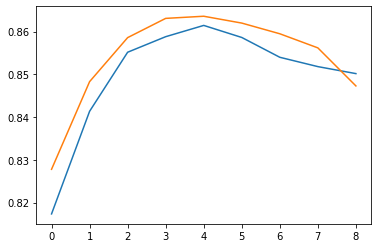

In [103]:
plt.plot(np.mean(his0_sum,0)[:,-1])
plt.plot(np.mean(his1_sum,0)[:,-1])

In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open('xcep_hist.pkl', 'rb') as f:
    his0 = pickle.load(f)
with open('xcep_hist_p.pkl', 'rb') as f:
    his1 = pickle.load(f)

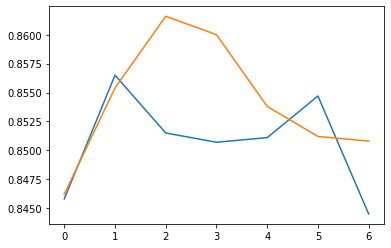

In [105]:
plt.plot(np.array(his0)[-1])
plt.plot(np.array(his1)[:,-1])

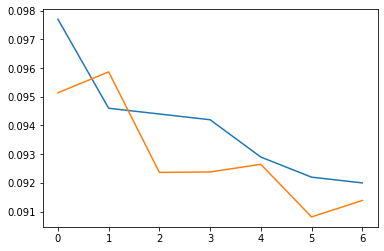

In [106]:
plt.plot(np.array(his0)[-2])
plt.plot(np.array(his1)[:,-2])

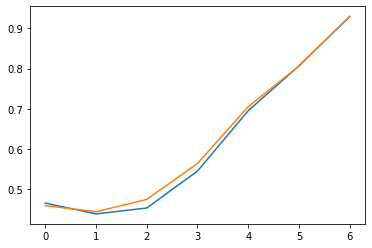

In [107]:
plt.plot(np.array(his0)[0])
plt.plot(np.array(his1)[:,0])